<a href="https://colab.research.google.com/github/luup-netizen/notion-cover/blob/main/lectures/module2/2-2_timeseries_timedomain/HW2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install os
!pip install wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import wfdb

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [2]:
# Download some files of a sepsis dataset
sepsis_folder = "sepsis_dataset"
if not os.path.exists(sepsis_folder):
    os.mkdir(sepsis_folder)
patient_list = range(1, 11)
patient_list = [f'p{str(s).zfill(6)}.psv' for s in patient_list]
for f in patient_list:
  !wget -nc https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/{f}
  os.rename(f, os.path.join(sepsis_folder, f))

--2025-11-26 06:54:49--  https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/p000001.psv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9062 (8.8K) [text/plain]
Saving to: ‘p000001.psv’

p000001.psv         100%[===================>]   8.85K  --.-KB/s    in 0s      

2025-11-26 06:54:50 (185 MB/s) - ‘p000001.psv’ saved [9062/9062]

--2025-11-26 06:54:50--  https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/p000002.psv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3864 (3.8K) [text/plain]
Saving to: ‘p000002.psv’

p000002.psv         100%[===================>]   3.77K  --.-KB/s    in 0s      

2025-11-26 06:54:50 (589 MB/s) - ‘p000002.psv’ saved [3864/3864]

--2025-11-26 06:

In [3]:
# Convert the sepsis dataset to a single csv
def load_single_file(file_path):
    df = pd.read_csv(file_path, sep="|")
    df['PatientID'] = file_path.split(os.sep)[-1][:-4]
    df['Hour'] = df.index
    keep_cols = ['PatientID', 'Age', 'Gender', 'SepsisLabel', 'Hour',
                 'HR', 'O2Sat', 'SBP', 'DBP', 'Resp']
    df = df[keep_cols]
    df.rename(columns={'Gender': 'Sex', 'SepsisLabel': 'HasSepsis'}, inplace=True)
    return df

def create_final_table(patient_list):
    final_df = pd.DataFrame()
    for f in patient_list:
        df = load_single_file(os.path.join(sepsis_folder, f))
        final_df = pd.concat([final_df, df])
    final_df.to_csv('sepsis.csv',index=False)
create_final_table(patient_list)

In [4]:
# Load the PPG data
user = '100004'
signals, fields = wfdb.rdsamp(f'{user}_PPG', pn_dir=f'butppg/{user}')
ppg = signals.flatten()
ppg = ppg[:200]
ppg -= ppg.mean()
fs = fields['fs']
ppg_time = np.arange(len(ppg))/fs

# Save it in a DataFrame
df = pd.DataFrame()
df['Time'] = ppg_time
df['PPG'] = ppg
df.to_csv('ppg.csv', index=False)

In [5]:
import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
def colab2pdf():
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
    if not pathlib.Path("/usr/local/bin/quarto").exists():
        !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))

# Instructions

Please complete all of the exercises below. Across this module, some of the exercises are expected to produce very specific outputs, while others may have a variety of reasonable answers.

# Exercise 1: Visualizing Tabular Data

This exercise will involve the sepsis dataset we used in class.

In [22]:
df = pd.read_csv("sepsis.csv")
df

,PatientID,Age,Sex,HasSepsis,Hour,HR,O2Sat,SBP,DBP,Resp
0,p000001,83.14,0,0,0,NaN,NaN,NaN,NaN,NaN
1,p000001,83.14,0,0,1,97.0,95.0,98.0,NaN,19.0
2,p000001,83.14,0,0,2,89.0,99.0,122.0,NaN,22.0
3,p000001,83.14,0,0,3,90.0,95.0,NaN,NaN,30.0
4,p000001,83.14,0,0,4,103.0,88.5,122.0,NaN,24.5
...,...,...,...,...,...,...,...,...,...,...
580,p000010,76.71,0,0,18,82.0,96.0,109.0,50.0,20.0
581,p000010,76.71,0,0,19,79.0,94.0,97.0,49.0,21.0
582,p000010,76.71,0,0,20,79.0,90.0,117.0,54.0,19.0
583,p000010,76.71,0,0,21,84.0,91.0,124.0,59.0,23.0


**(Part 1)** Create a line graph that shows the oxygen saturation data (`O2Sat`) for patients `p000008`, `p000009`, and `p000010` over time. Your plot should be clearly legible and properly labeled with axis labels, a title, and a legend.

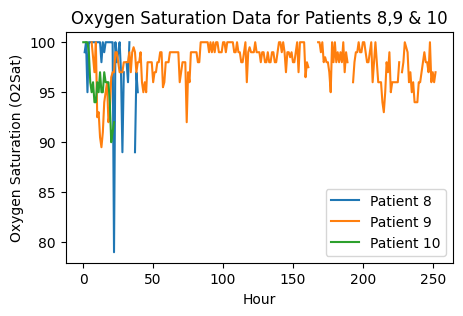

,Hour
PatientID,
p000001,54
p000002,23
p000003,48
p000004,29
p000005,48
p000006,17
p000007,45
p000008,40
p000009,258


In [73]:

# get the information we need (O2 SAT collumn and hour for each patient)

p8_data = df[df['PatientID'] == 'p000008'] #row selector for patient 8
p8_O2Sat = p8_data['O2Sat'] #get saturation data
p8_hour = p8_data['Hour'] #get time data

p9_data = df[df['PatientID'] == 'p000009'] #row selector for patient 9
p9_O2Sat = p9_data['O2Sat'] #get saturation data
p9_hour = p9_data['Hour'] #get time data


p10_data = df[df['PatientID'] == 'p000010'] #row selector for patient 10
p10_O2Sat = p10_data['O2Sat'] #get saturation data
p10_hour = p10_data['Hour'] #get time data


#all code is the same except two lines: plot the new data, then change title
plt.figure(figsize=(5, 3))
plt.plot(p8_hour, p8_O2Sat, label='Patient 8')
plt.plot(p9_hour, p9_O2Sat, label='Patient 9')
plt.plot(p10_hour, p10_O2Sat, label='Patient 10')
plt.title('Oxygen Saturation Data for Patients 8,9 & 10')
plt.xlabel('Hour')
plt.ylabel('Oxygen Saturation (O2Sat)')
plt.legend()
plt.show()

df.groupby("PatientID")["Hour"].count()
#i noticed that patient 9 had way more hours collected than 8 and 10, so just used this to confirm that i did not mess up the code

**(Part 2)** Create a bar graph that shows the number of hours during which each patient's oxygen saturation (`O2Sat`) went below 95. Some patients do not have data from this particular sensor, so it is okay if they are excluded from your graph. Your plot should be clearly legible and properly labeled with axis labels and a title.

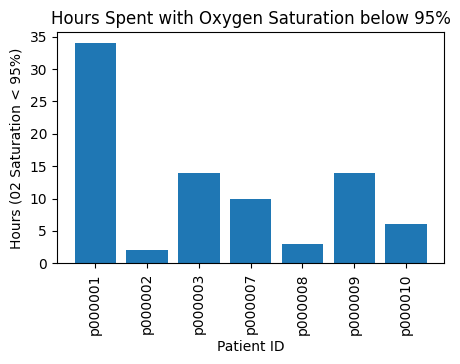

In [72]:
# Write your code here: also 2b
lowO2 = df[df["O2Sat"] < 95]
hours_low = lowO2.groupby("PatientID")["Hour"].count()
hours_low

plt.figure(figsize=(5, 3))
plt.bar(hours_low.index, hours_low)
plt.xlabel('Patient ID')
plt.ylabel('Hours (02 Saturation < 95%)') # Add a label to the y-axis
plt.title('Hours Spent with Oxygen Saturation below 95%')
plt.xticks(rotation = 90)
plt.show()


**(Part 3)** Create a bar graph that shows the split between male (`0`) and female (`1`) patients in the dataset. Remember that there are multiple entries per patient in this table. Your graph should not reflect the number of rows in the `DataFrame`, but rather the number of unique patients in the dataset. Your plot should be clearly legible and properly labeled with axis labels and a title.

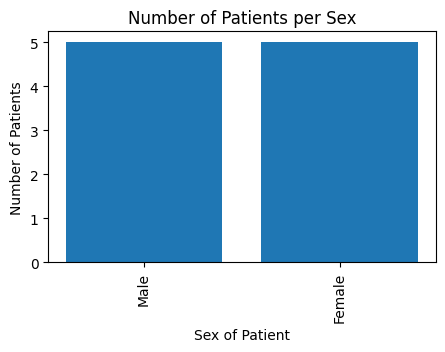

In [71]:
# Write your code here
# Remove duplicates of patient id

unique = df.drop_duplicates("PatientID")
sexcounts = unique["Sex"].value_counts()
sexcounts
sex_map = {0: "Male", 1: "Female"}
sexcounts_MF = sexcounts.rename(index=sex_map)
sexcounts_MF


plt.figure(figsize=(5, 3))
plt.bar(sexcounts_MF.index, sexcounts_MF.values)
plt.xlabel('Sex of Patient' )
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Sex')
plt.xticks(rotation = 90)
plt.show()

# Exercise 2: Working with PPG Data

This exercise will involve real-world data that was collected from a photoplethysmography (PPG) sensor. In short, this type of sensor relies on optically measuring the amount of blood that flows in and out of a peripheral site like a fingertip to capture the cardiac waveform.

In [74]:
df = pd.read_csv("ppg.csv")
df



,Time,PPG
0,0.000000,-5.088518
1,0.033333,-12.501646
2,0.066667,-16.617164
3,0.100000,-20.412686
4,0.133333,-16.688403
...,...,...
195,6.500000,30.430563
196,6.533333,21.500355
197,6.566667,21.367937
198,6.600000,20.677867


**(Part 1)** Create a line graph that shows the PPG data over time. Your plot should be clearly legible and properly labeled with axis labels and a title.

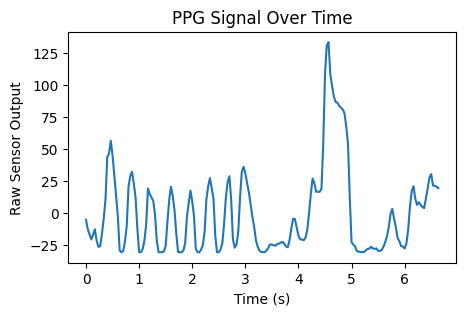

In [76]:
# Write your code here

plt.figure(figsize=(5,3))
plt.plot(df['Time'], df['PPG'])
plt.xlabel('Time (s)')
plt.ylabel('Raw Sensor Output')
plt.title('PPG Signal Over Time')
plt.show()

Notice that the first half of the signal looks like a consistent heartbeat, while the second half of the signal looks less consistent. This is likely because the patient moved their fingertip or the sensor during this recording.

**(Part 2)** Write code that will calculate the sampling rate of this signal.

In [78]:
dt = df['Time'].diff().mean()
dt #value in seconds is 0.03333333333333333

np.float64(0.03333333333333333)

**(Part 3)** Write code that uses a 0.5-second sliding window with 0% overlap to automatically identify when the PPG signal quality is high. You can use whatever metric(s) and thresholds you deem fit to define signal quality. This code should print out the start and end time of each window when the signal quality is high.

In [ ]:
# Write your code here

**(Part 4)** Pick the largest contiguous chunk of the PPG signal where the signal quality is high. Then, write code that will use a sliding window of your choosing to count the number of heartbeats in that part of the data.

In [ ]:
good_ppg = df.iloc[] # TODO: put your indices inside the square bracket
# Write your code here

# Prepare Submission

To get full credit for this assignment, you should submit your assignment in two formats so that we can easily grade and debug your code:
1. **.ipynb:** First, confirm that your code can run from start to finish without any errors. To check this, go to "Runtime" > "Run all" in the Google Colab menu. If everything looks good, you can export your file by going to "File" > "Download" > "Download .ipynb".
2. **.pdf:** Run the function called `colab2pdf()` below. This will automatically convert your notebook to a PDF. Note that while "File" > "Print" > "Save as PDF" also works, it requires you to manually expand all of the cells and may cut off some images.

In [33]:
colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>